In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

# Generate some example data
np.random.seed(0)
timesteps = 100
num_samples = 1000

x_train = np.random.rand(num_samples, timesteps, 1)

print(x_train)

[[[0.5488135 ]
  [0.71518937]
  [0.60276338]
  ...
  [0.02010755]
  [0.82894003]
  [0.00469548]]

 [[0.67781654]
  [0.27000797]
  [0.73519402]
  ...
  [0.25435648]
  [0.05802916]
  [0.43441663]]

 [[0.31179588]
  [0.69634349]
  [0.37775184]
  ...
  [0.86219152]
  [0.97291949]
  [0.96083466]]

 ...

 [[0.1755579 ]
  [0.07195134]
  [0.6645303 ]
  ...
  [0.00219381]
  [0.79661686]
  [0.15715099]]

 [[0.16175203]
  [0.20587649]
  [0.93604932]
  ...
  [0.44172662]
  [0.85701721]
  [0.17779312]]

 [[0.07849112]
  [0.27611425]
  [0.0851793 ]
  ...
  [0.81013284]
  [0.55103228]
  [0.22575586]]]


In [2]:
#Create sine wave(smooth, periodic oscillation) as target output.

y_train = np.sin(np.arange(timesteps * num_samples) / 10.0) #process periodic patterns

print(y_train)

[ 0.          0.09983342  0.19866933 ... -0.01058343 -0.11035838
 -0.20903067]


In [3]:
y_train = y_train.reshape((num_samples, timesteps, 1))

y_train

array([[[ 0.        ],
        [ 0.09983342],
        [ 0.19866933],
        ...,
        [-0.27176063],
        [-0.36647913],
        [-0.45753589]],

       [[-0.54402111],
        [-0.62507065],
        [-0.69987469],
        ...,
        [ 0.75157342],
        [ 0.81367374],
        [ 0.8676441 ]],

       [[ 0.91294525],
        [ 0.94912455],
        [ 0.97582052],
        ...,
        [-0.98948708],
        [-0.9989818 ],
        [-0.99849503]],

       ...,

       [[-0.98790108],
        [-0.96748299],
        [-0.93739813],
        ...,
        [ 0.90857521],
        [ 0.86233358],
        [ 0.80747579]],

       [[ 0.74454997],
        [ 0.67418486],
        [ 0.59708351],
        ...,
        [-0.53511039],
        [-0.44809958],
        [-0.35661151]],

       [[-0.26156029],
        [-0.16389565],
        [-0.06459341],
        ...,
        [-0.01058343],
        [-0.11035838],
        [-0.20903067]]])

C:\Users\DHRUVI\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.5446 - val_loss: 0.5038
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5019 - val_loss: 0.5011
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5010 - val_loss: 0.5008
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4988 - val_loss: 0.5010
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5006 - val_loss: 0.5006
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4989 - val_loss: 0.5017
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5002 - val_loss: 0.5022
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5008 - val_loss: 0.5008
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4995 - val_loss: 0.5011
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4984 - val_loss: 0.5014


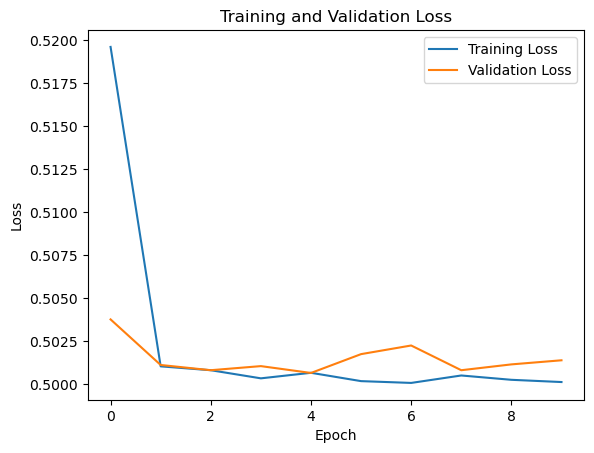

In [4]:
# Building the RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(timesteps, 1), return_sequences=False))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Visualize the model architecture
model.summary()

# Training the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
# Generate predictions
x_test = np.random.rand(1, timesteps, 1)
predicted_output = model.predict(x_test)

print("Predicted output:", predicted_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Predicted output: [[-0.04213658]]
